# 1장 수열과 급수

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import os
if not os.path.exists('img/ch-1'):
    os.makedirs('img/ch-1', exist_ok=True)

## 1.1 수열

In [18]:
# 네 가지 수를 요소로 갖는 리스트(list) 변수 a를 생성
a = [1, 1/4, 1/9, 1/16]

In [19]:
# 리스트 변수 a에서 인덱스 0에 할당된 요소를 출력
print(a[0])

1


In [20]:
# 정수형(int) 값을 입력받아 실수형(float) 값을 반환하는 함수 a를 정의
def a(n: int) -> float: 
  return 1 / n**2

In [21]:
# 함수 a에 자연수 2를 입력하고 반환된 결과를 출력
print(a(2))

0.25


In [22]:
# 입력값 n에 대해 1/n^2를 반환하는 함수 a를 정의
def a(n): 
  return 1 / n**2

In [23]:
# 입력값 n에 대해 1/n^2를 반환하는 람다함수 a를 정의
a = lambda n: 1 / n**2

In [24]:
# 식 (1.4)로 정의된 무한수열의 일반항 함수 a를 정의
def a(n: int) -> float:
  if n % 2 == 1: # n % 2는 n을 2로 나누었을 때의 나머지를 반환
    return 1 / n**2
  else: # if 문의 결과가 거짓(false)일 때 else 문 실행
    return -1 / n**2

In [25]:
# 람다함수에도 다음과 같이 if else 문 사용 가능
a = lambda n: 1 / n**2 if n % 2 == 1 else -1 / n**2

In [26]:
# 식 (1.6)을 파이썬 코드로 구현
def a(n: int) -> float:
  term = 1
  for i in range(n):
    term *= (2*(n-i)+1)/(2*(n-i)+2)
  return term

In [27]:
# 식 (1.5)로 정의된 수열의 10^6번째 항을 출력
print(a(10**6))

0.001128378461859233


In [28]:
# 식 (1.7)의 항을 순서대로 곱하여 계산
def a(n: int) -> float:
    term = 1
    for i in range(n+1):
        term /= 4
    for i in range(2*n+2):
        term *= i+1
    for i in range(n+1):
        term /= (i+1)**2
    return term

In [29]:
# 함수를 이용한 수열의 일반항 계산
print(a(10))
print(a(10**2))
print(a(10**3))

0.16818809509277344
inf
0.0


In [30]:
# 2의 제곱근을 십진법 소수점 n번째 자리까지 계산
def sqrt_decmial(n: int) -> float:
    sqrt = 1 # 결과를 저장할 변수 선언
    for i in range(n):
        temp, inc = sqrt, 1 / 10 ** (i + 1) # 현재 값과 증분 저장
        for _ in range(10):
            if 2 < (temp + inc) ** 2:
                break     # 식 (1.10)의 부등식이 성립하는 즉시 반복문 종료
            temp += inc   # 증분을 더해가며 반복문 실행
        sqrt = temp       # 결괏값 업데이트
    return round(sqrt, n) # 결과값을 n번째 소수점 자리까지 표시

In [31]:
# n번째 소수를 찾는 함수 정의
def nth_prime(n: int) -> float:
    prime_list = [2]             # 소수의 수열을 저장하는 리스트 선언
    for _ in range(2, n+1):
        prime = False            # 소수인지 판별한 결과를 저장하는 변수 선언
        p = prime_list[-1] + 1   # 마지막으로 찾은 소수에 1을 더한 값을 p에 저장
        while not prime:
            for i in prime_list: # 현재까지 찾은 소수 중에서
                if p % i == 0:   # p가 그중 하나로 나누어떨어지는 경우,  
                    p += 1       # p에 1을 더하고 
                    break        # 위 과정을 반복
            else:                # 만약 if 문이 실행되지 않으면, 
                prime = True     # p는 새로운 소수이므로
        prime_list.append(p)     # 리스트에 추가하고
    return prime_list[-1]        # 위 과정을 n번 반복한 뒤, 마지막 소수를 반환

In [32]:
# 식 (1.11)을 이용해 피보나치 수열 구현
def fibonacci(n: int) -> int:
    a, b = 1, 1
    for i in range(n-1):
        a, b = b, a+b
    return a

In [33]:
# 재귀함수를 이용해 피보나치 수열 구현
def fibonacci_recr(n: int) -> int:
    if n < 0: return 0
    if 0 <= n <= 1: return n
    return fibonacci_recr(n-1) + fibonacci_recr(n-2)

In [34]:
# 점화식을 이용해 수열의 일반항을 계산
def sqrt(n: int) -> float:
    term = 1
    for _ in range(n):
        term = (term + 2/term)/2
    return term

In [35]:
# 수열 (1.13)을 구현하고 최초 20개 항을 출력
a = lambda n: (1 + 1/n)**n
print([f'%.3f'%a(n) for n in range(1, 21)])

['2.000', '2.250', '2.370', '2.441', '2.488', '2.522', '2.546', '2.566', '2.581', '2.594', '2.604', '2.613', '2.621', '2.627', '2.633', '2.638', '2.642', '2.646', '2.650', '2.653']


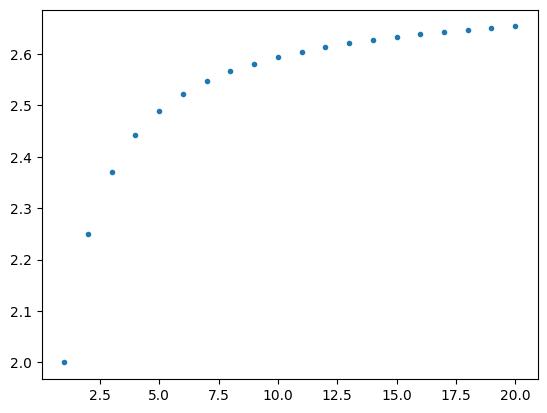

In [36]:
# 수열의 항을 점 그래프로 표현
import matplotlib.pyplot as plt # 그래픽 표현을 위한 파이썬 코드를를 모아놓은 matplotlib 라이브러리 사용

a = lambda n: (1 + 1/n)**n  # 수열의 일반항을 함수로 정의
x = range(1, 21)            # 1부터 20까지의 자연수를 리스트로 저장
y = [a(n) for n in x]       # 각 자연수(n)마다 수열의 항을 리스트에 저장
plt.plot(x, y, '.')         # 리스트의 요소를 x, y축에 점(.)으로 표시
plt.savefig('img/ch-1/1-3.png', dpi=600, bbox_inches='tight')

In [37]:
# 파이썬 Qt 모듈 설치 
!pip install pyqt5

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\hyosa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
# 그래프를 팝업 윈도우에 출력하도록 설정
%matplotlib qt

In [39]:
# 그래프를 코드블록 사이에 출력하도록 설정
%matplotlib inline

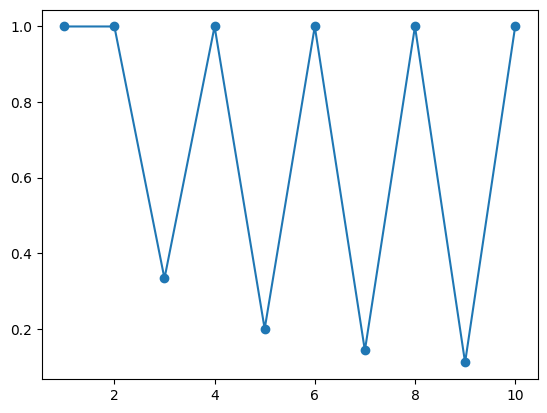

In [40]:
# 수열을 그래프로 표현
a = lambda n: 1 if n % 2 == 0 else 1/n
x = range(1, 11)
y = [a(n) for n in x] 
plt.plot(x, y, 'o-')  # 좌표점을 동그라미와 선으로 연결된 모양(o-)으로 출력
plt.savefig('img/ch-1/1-4.png', dpi=600, bbox_inches='tight')

In [41]:
# 식 (1.15)로 정의된 수열을 구현
def a(n: int) -> float:
    term = 2                           # 일반항의 값을 저장할 변수를 설정
    for _ in range(n): 
        term = 2/3*term + 2/3/term**2  # 식 (1.15)의 우변을 계산하여 업데이트
    return term

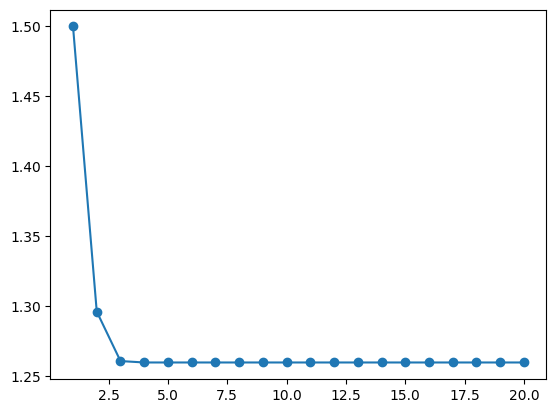

In [42]:
# 수열 (1.15)의 최초 20개 항을 그래프로 표현
x = range(1, 21)
y = [a(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-5.png', dpi=600, bbox_inches='tight')

In [43]:
# 식 (1.17)의 수열의 항을 인덱스 10^2부터 10^8까지 출력
a = lambda n: (1 + 1/n)**n
for k in range(2, 9):
    y = a(10**k)
    print(f'%.8f'%y, f'%.5f'%y, f'%.3f'%y)

2.70481383 2.70481 2.705
2.71692393 2.71692 2.717
2.71814593 2.71815 2.718
2.71826824 2.71827 2.718
2.71828047 2.71828 2.718
2.71828169 2.71828 2.718
2.71828180 2.71828 2.718


## 1.2 급수

In [44]:
# 조화급수의 부분합을 계산하는 함수 정의
def harmonic(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += 1/i
    return sum

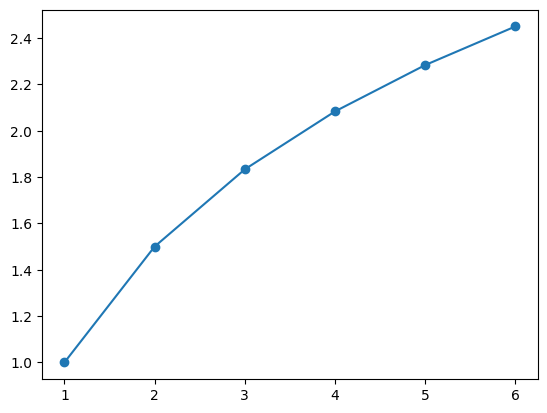

In [45]:
# 조화급수의 최초 6개의 부분합을 그래프로 표현
x = range(1, 7)
y = [harmonic(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-8.png', dpi=600, bbox_inches='tight')

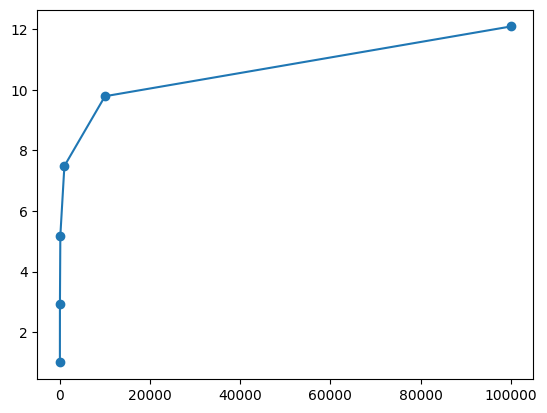

In [46]:
# 조화급수의 부분합을 1부터 10^5까지 그래프로 표현
x = [10**i for i in range(6)]
y = [harmonic(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-9.png', dpi=600, bbox_inches='tight')

In [47]:
# 급수 (1.28)의 부분합을 함수로 정의
def s(n: int) -> float:
    sum = 0
    for i in range(1, n+1): sum += 1/i**2
    return sum

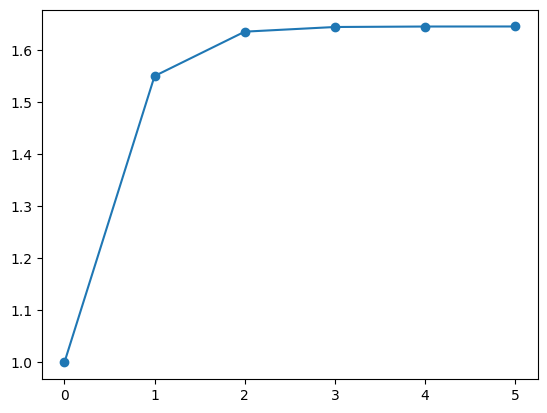

In [48]:
# 급수 (1.28)의 부분합을 그래프로 출력
x = range(6)
y = [s(10**n) for n in x]  # 인덱스를 지수적으로 1부터 10^5까지 증가시킴
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-10.png', dpi=600, bbox_inches='tight')

In [49]:
# 급수 (1.29)의 부분합을 함수로 정의
def s(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        if i % 2:
            sum += 1 / i   # 홀수항의 부호는 양수
        else:
            sum += -1 / i  # 짝수항의 부호는 음수
    return sum

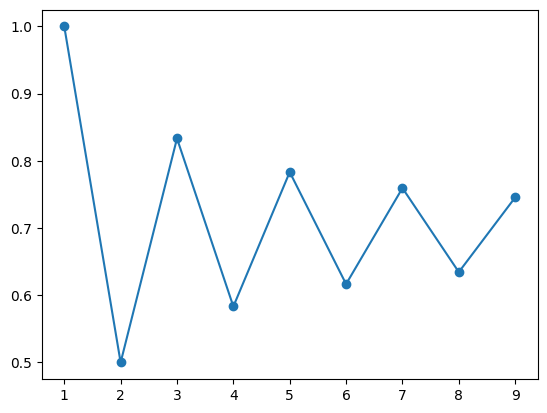

In [50]:
# 급수 (1.29)의 최초 9개 부분합을 그래프로 표현
x = range(1, 10)
y = [s(n) for n in x]
plt.plot(x, y, 'o-')
plt.savefig('img/ch-1/1-11.png', dpi=600, bbox_inches='tight')

In [51]:
# 교대급수 (1.30)의 부분합을 함수로 정의
def s(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        if i % 2: sum += 1 / i**2
        else: sum += -1 / i**2
    return sum

In [52]:
# 교대급수 (1.30)의 부분합을 인덱스를 10부터 10^7까지 지수적으로 증가시켜 출력
print([f'%.4f'%s(10**n) for n in range(1,8)])

['0.8180', '0.8224', '0.8225', '0.8225', '0.8225', '0.8225', '0.8225']


In [53]:
# 급수 (1.31)의 n번째 부분합을 계산하는 함수를 정의
def s(n: int) -> float:
    odd, iter, sum = 1, 1, 0  # 홀수항(odd), 묶음의 순번(iter), 부분합(sum)의 변수
    while True:
        for _ in range(iter): # iter번째 묶음에서 양수항을 iter번 더하기
            sum += 1/(odd)    # 부분합에 홀수의 역수 더하기
            odd += 2          # 다음 홀수 찾기
            n -= 1            # 앞으로 남은 항의 개수를 차감
            if n == 0:
                return sum    # 더 이상 남은 항이 없을 때 결과를 출력
        sum -= 1/(2*iter)     # 홀수항을 모두 더한 뒤 짝수항 빼기
        n -= 1
        if n == 0:
            return sum        # 더 이상 남은 항이 없을 때 결과를 출력
        iter += 1             # 다음 묶음을 계산

In [54]:
# 급수 (1.31)의 부분합을 인덱스 10부터 10^6까지 지수적으로 증가시켜 출력
print([f'%.4f'%s(10**n) for n in range(1, 7)])

['1.0385', '1.6688', '2.2387', '2.8223', '3.3978', '3.9736']


In [55]:
# 급수 (1.32)의 n번째 부분합을 계산하는 함수
def s(n: int) -> float:
    odd, iter, sum = 1, 1, 0
    while True:
        for _ in range(iter):
            sum += 1 / odd**2
            odd += 2
            n -= 1
            if n == 0:
                return sum
        sum -= 1 / (2*iter)**2
        n -= 1
        if n == 0:
            return sum
        iter += 1

In [56]:
# 급수 (1.32)의 부분합을 인덱스 10부터 10^7까지 지수적으로 증가시켜 출력
print([f'%.4f'%s(10**n) for n in range(1, 8)])

['0.8578', '0.8396', '0.8280', '0.8242', '0.8230', '0.8226', '0.8225']


In [57]:
# 식 (1.37)의 첫 번째 급수의 부분합을 함수로 구현
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += (1/2)**(i/2)
    return sum

In [58]:
# 식 (1.37)의 첫 번째 급수의 부분합을 10부터 10^5까지 인덱스를 증가시켜 출력
print([f'%.4f'%s1(10**n) for n in range(1, 6)])

['2.3388', '2.4142', '2.4142', '2.4142', '2.4142']


In [59]:
# 식 (1.37)의 두 번째 급수의 부분합을 함수로 구현
def s2(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += (1/(2*i))**(1/2)
    return sum

In [60]:
# 식 (1.37)의 두 번째 급수의 부분합을 10부터 10^5까지 인덱스를 증가시켜 출력
print([f'%.4f'%s2(10**n) for n in range(1, 6)])

['3.5504', '13.1448', '43.6999', '140.3923', '446.1821']


In [61]:
# 급수 (1.38)의 부분합을 함수로 구현
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        term = 1
        for j in range(1, i+1):
            term *= j**2/(2*j)/(2*j-1)
        sum += term
    return sum

In [62]:
# 초항이 1/2이고 공비가 1/4인 기하급수의 부분합을 함수로 구현
def s2(n: int) -> float:
    sum = 0
    for i in range(n):
        sum += (1/4)**i
    return sum/2

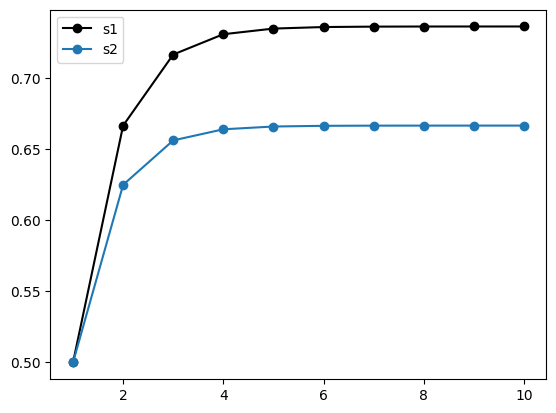

In [63]:
# 위에서 정의한 두 함수 s1, s2에 1부터 10까지 입력하여 결과를 그래프로 출력
x = range(1, 11)
y1 = [s1(n) for n in x]
y2 = [s2(n) for n in x]
plt.plot(x, y1, 'ko-', label='s1')  # 그래프의 레이블(label)을 's1'로 지정
plt.plot(x, y2, 'o-', label='s2')   # 그래프의 레이블을 's2'로 지정
plt.legend()                        # 두 그래프의 범례(legend) 표시
plt.savefig('img/ch-1/1-15.png', dpi=600, bbox_inches='tight')

In [64]:
# 급수 (1.41)의 부분합을 함수로 구현
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += (1 + 1/i)**(i**2)
    return sum

In [65]:
# 초항과 공비가 자연상수(e)인 급수의 부분합을 함수로 구현
e = (1+1/1e10)**1e10        # 자연상수의 근삿값 계산
def s2(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += e**i
    return sum

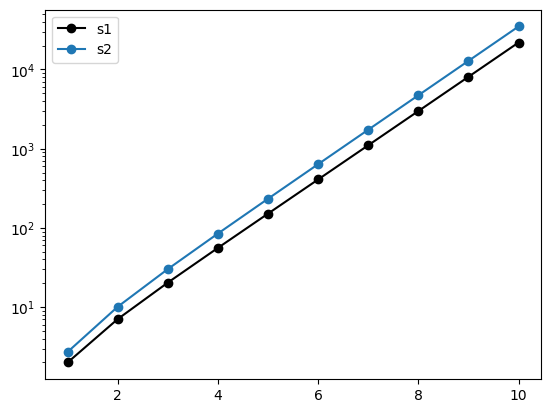

In [66]:
# 1부터 10까지의 입력값에 대한 함수 s1과 s2 값을 그래프로 출력
x = range(1, 11)
y1 = [s1(n) for n in x]
y2 = [s2(n) for n in x]
plt.plot(x, y1, 'ko-', label='s1')
plt.plot(x, y2, 'o-', label='s2')
plt.legend()
plt.yscale('log') # y축의 눈금을 로그 단위로 변환
plt.savefig('img/ch-1/1-16.png', dpi=600, bbox_inches='tight')

In [67]:
# 극한 (1.42)의 근삿값 계산
a = lambda n: (1-1/n)**n
print(a(10**6))

0.36787925722106646


In [68]:
# 급수 (1.43)의 부분합을 함수로 구현
def s1(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += 1/(i**2-i-1)
    return sum

In [69]:
# p-급수의 부분합을 함수로 구현
def s2(n: int) -> float:
    sum = 0
    for i in range(1, n+1):
        sum += 1/i**2
    return sum

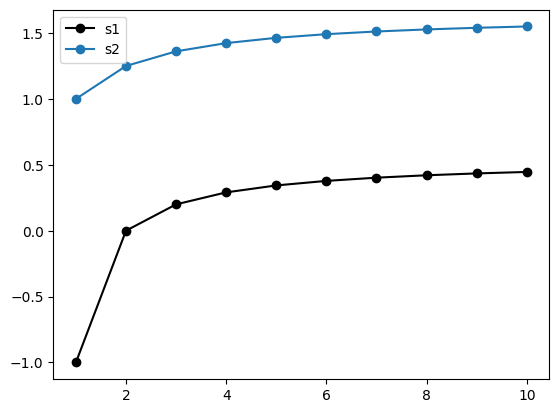

In [70]:
# 두 함수 s1, s2의 부분합을 그래프로 출력
x = range(1, 11)
y1 = [s1(n) for n in x]
y2 = [s2(n) for n in x]
plt.plot(x, y1, 'ko-', label='s1')
plt.plot(x, y2, 'o-', label='s2')
plt.legend()

plt.savefig('img/ch-1/1-17.png', dpi=600, bbox_inches='tight')

In [71]:
# 멱급수 (1.52)를 함수로 구현
def a(x: float) -> float:
    eps = 1e-15
    if x <= -1 or 3 <= x:         # 입력된 값이 -1과 3의 바깥에 있는 경우
        return float('nan')       # 수가 아닌 데이터(nan)를 반환
    sum, term = 0, 1
    while not -eps < term < eps:  # 급수의 항의 크기가 eps보다 작아질 때까지
        sum += term               # 급수의 항을 더함
        term *= (x-1)/2           # 다음 항을 구하기 위해 이전 값에 공비를 곱함
    return sum 

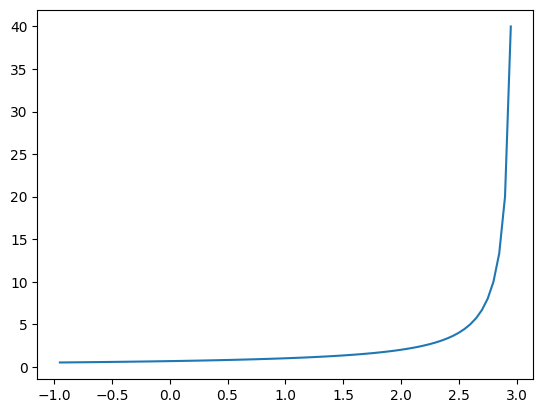

In [72]:
# 멱급수 (1.52)의 값을 -.95부터 2.95까지 0.05씩 증가시켜 구하고 그래프로 출력
x = [-.95 + .05*i for i in range(int(4/.05))]
y = [a(t) for t in x]
plt.plot(x, y)
plt.savefig('img/ch-1/1-18.png', dpi=600, bbox_inches='tight')

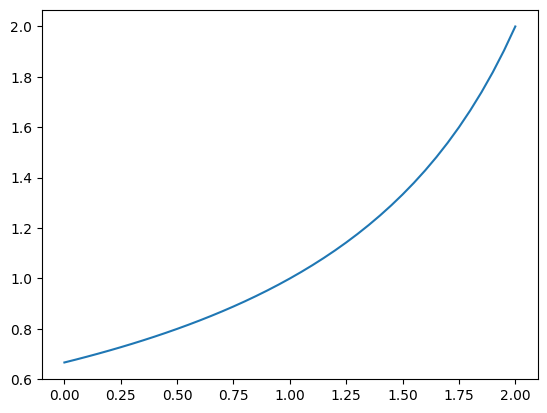

In [73]:
# 멱급수 (1.53)의 그래프 출력
x = [0 + .05*i for i in range(int(2/.05)+1)]
y = [a(t) for t in x]
plt.plot(x, y)

plt.savefig('img/ch-1/1-19.png', dpi=600, bbox_inches='tight')

## 1.3 수열과 급수의 활용 

In [74]:
# 지수함수의 계산
def exp(x: float) -> float:
    for _ in range(30): x /= 2   # x/2^30을 계산
    x += 1                       # x에 1 + x/2^30을 대입
    for _ in range(30): x *= x   # x^(2^30)을 계산
    return x                     # 결과를 출력

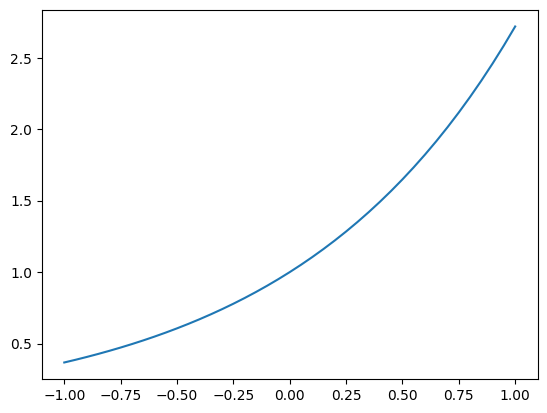

In [75]:
# 지수함수의 그래프 출력
x = [-1 + .05*i for i in range(int(2/.05)+1)]
y = [exp(t) for t in x]
plt.plot(x, y)
plt.savefig('img/ch-1/1-20.png', dpi=600, bbox_inches='tight')

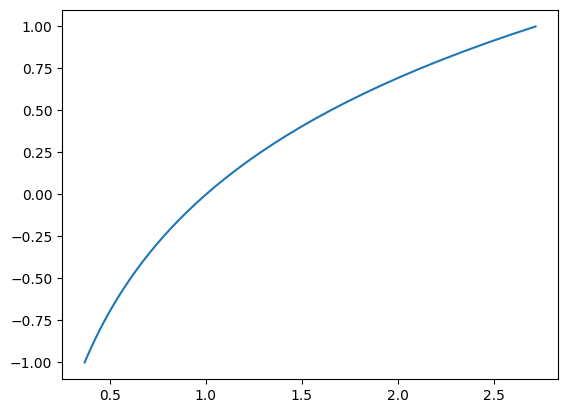

In [76]:
# 지수함수의 값을 이용한 로그함수의 그래프 출력
x = [-1 + .05*i for i in range(int(2/.05)+1)]
y = [exp(t) for t in x]
plt.plot(y, x)
plt.savefig('img/ch-1/1-21.png', dpi=600, bbox_inches='tight')

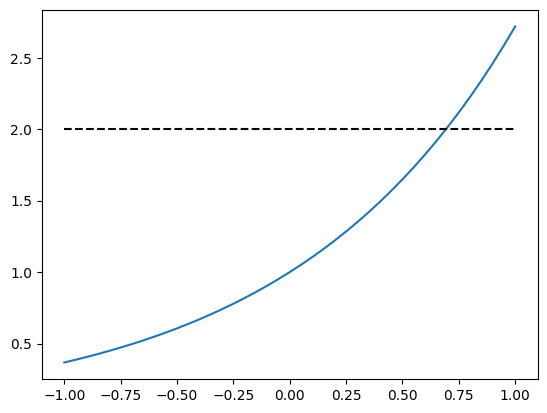

In [77]:
# 지수함수의 그래프와 y=2를 지나는 수평선 출력
x = [-1 + .05*i for i in range(int(2/.05)+1)]
y = [exp(t) for t in x]
plt.plot(x, y)
plt.plot([-1., 1.], [2., 2.], 'k--')
plt.savefig('img/ch-1/1-22.png', dpi=600, bbox_inches='tight')

In [78]:
# 이분법을 이용해 로그함수를 구현
def log(x: float) -> float:
    if x <= 0:
        return float('nan')
    n = 1
    while not (exp(-n) <= x <= exp(n)): n += 1
    a, b, c = -n, n, 0
    while not (a == c or b == c):
        if exp(c) >= x: b = c
        else:           a = c
        c = (b+a)/2
    return c

In [79]:
# 멱급수를 이용해 코사인함수를 파이썬 코드로 구현
pi = 3.141592653589793

def cos(x):
    while x <= -pi:                # 입력된 값이 -pi보다 커질 때까지 2pi를 더함
        x += 2*pi
    while x >= pi:                 # 입력된 값이 pi보다 작아질 때까지 2pi를 뺌
        x -= 2*pi  
    sum, term, i = 1, 1, 1
    while term != 0:               # 급수의 항이 0과 같아질 때까지 반복
        term *= x*x/(2*i)/(2*i-1)  # 급수의 n번째 항의 크기를 계산
        if i%2 == 0: sum += term   # 인덱스가 짝수이면 더함
        else:        sum -= term   # 인덱스가 홀수이면 뺌
        i += 1
    return sum

In [80]:
# 멱급수를 이용해 사인함수를 파이썬 코드로 구현
def sin(x):
    while x <= -pi:
        x += 2*pi
    while x >= pi:
        x -= 2*pi        
    sum, term, i = x, x, 1
    while term != 0:
        term *= x*x/(2*i+1)/(2*i)
        if i%2 == 0: sum += term
        else:        sum -= term
        i += 1
    return sum

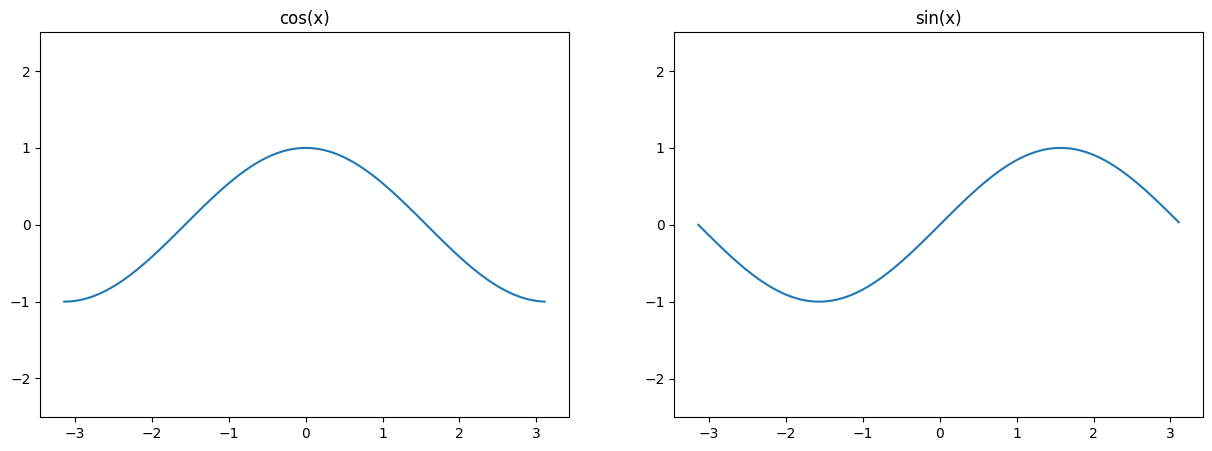

In [81]:
# 코사인함수와 사인함수의 그래프 출력
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
x = [-pi + .05*i for i in range(int(2*pi/.05)+1)]
y1 = [cos(t) for t in x]
y2 = [sin(t) for t in x]
ax[0].plot(x, y1)
ax[1].plot(x, y2)
ax[0].set_title('cos(x)')
ax[1].set_title('sin(x)')
ax[0].axis('equal')
ax[1].axis('equal')
plt.savefig('img/ch-1/1-24.png', dpi=600, bbox_inches='tight')


# 1.4 프로젝트: 계산기 만들기 

In [ ]:
# 기본함수를 하나의 딕셔너리에 정의
basic_func = {     # 딕셔너리 타입으로 정의
    'sqrt': sqrt,  # 문자열(string) 키(key) sqrt에는 sqrt 함수를 값(value)으로 할당
    'exp': exp,   
    'log': log, 
    'sin': sin, 
    'cos': cos,
}

In [ ]:
# 사칙연산을 함수로 정의
add = lambda x, y: x + y
subs = lambda x, y: x - y
mul = lambda x, y: x * y
div = lambda x, y: x / y

In [ ]:
# 사칙연산을 하나의 딕셔너리에 정의
arithmetic = {
    '+': add,
    '-': subs,
    '*': mul,
    '/': div,
}

계산기 프로그램 구현 코드는 `calculator.py` 참조